# 선형회귀로 당뇨병 수치 예측

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [3]:
dfX = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfy = pd.DataFrame(diabetes.target, columns=['target'])

In [4]:
dfX

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [5]:
dfy

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [6]:
X = dfX.values
y = dfy['target'].values

# train set, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [7]:
# W, b

W = np.random.rand(10)
b = np.random.rand()

In [8]:
W

array([0.28694857, 0.12677793, 0.17262124, 0.01564689, 0.26093212,
       0.40662016, 0.11206486, 0.876222  , 0.72898833, 0.70669649])

In [9]:
b

0.5101139411723734

In [10]:
# model

def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

In [12]:
# set loss

def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X,W,b,y):
    predictions = model(X,W,b)
    Loss = MSE(predictions,y)
    return Loss

In [13]:
# gradient

def gradient(X,W,b,y):
    N = len(W)
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * (X.T).dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dW, db

In [15]:
# train model

learning_rate = 0.001

losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate*dW
    b -= learning_rate*db
    L = loss(X, W, b, y)
    losses.append(L)
    
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 10 : Loss 3402.5941
Iteration 20 : Loss 3400.7312
Iteration 30 : Loss 3398.8786
Iteration 40 : Loss 3397.0362
Iteration 50 : Loss 3395.2038
Iteration 60 : Loss 3393.3815
Iteration 70 : Loss 3391.5690
Iteration 80 : Loss 3389.7664
Iteration 90 : Loss 3387.9735
Iteration 100 : Loss 3386.1903
Iteration 110 : Loss 3384.4166
Iteration 120 : Loss 3382.6524
Iteration 130 : Loss 3380.8975
Iteration 140 : Loss 3379.1520
Iteration 150 : Loss 3377.4157
Iteration 160 : Loss 3375.6885
Iteration 170 : Loss 3373.9704
Iteration 180 : Loss 3372.2612
Iteration 190 : Loss 3370.5610
Iteration 200 : Loss 3368.8696
Iteration 210 : Loss 3367.1869
Iteration 220 : Loss 3365.5129
Iteration 230 : Loss 3363.8475
Iteration 240 : Loss 3362.1906
Iteration 250 : Loss 3360.5422
Iteration 260 : Loss 3358.9022
Iteration 270 : Loss 3357.2705
Iteration 280 : Loss 3355.6470
Iteration 290 : Loss 3354.0317
Iteration 300 : Loss 3352.4244
Iteration 310 : Loss 3350.8253
Iteration 320 : Loss 3349.2341
Iteration 330 : L

In [26]:
learning_rate = 0.001

losses = []

for i in range(1, 30001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate*dW
    b -= learning_rate*db
    L = loss(X, W, b, y)
    losses.append(L)
    
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 2882.4939
Iteration 2000 : Loss 2882.4419
Iteration 3000 : Loss 2882.3901
Iteration 4000 : Loss 2882.3383
Iteration 5000 : Loss 2882.2867
Iteration 6000 : Loss 2882.2351
Iteration 7000 : Loss 2882.1837
Iteration 8000 : Loss 2882.1324
Iteration 9000 : Loss 2882.0812
Iteration 10000 : Loss 2882.0302
Iteration 11000 : Loss 2881.9792
Iteration 12000 : Loss 2881.9284
Iteration 13000 : Loss 2881.8778
Iteration 14000 : Loss 2881.8272
Iteration 15000 : Loss 2881.7768
Iteration 16000 : Loss 2881.7266
Iteration 17000 : Loss 2881.6765
Iteration 18000 : Loss 2881.6265
Iteration 19000 : Loss 2881.5767
Iteration 20000 : Loss 2881.5270
Iteration 21000 : Loss 2881.4774
Iteration 22000 : Loss 2881.4280
Iteration 23000 : Loss 2881.3787
Iteration 24000 : Loss 2881.3296
Iteration 25000 : Loss 2881.2806
Iteration 26000 : Loss 2881.2318
Iteration 27000 : Loss 2881.1831
Iteration 28000 : Loss 2881.1346
Iteration 29000 : Loss 2881.0862
Iteration 30000 : Loss 2881.0380


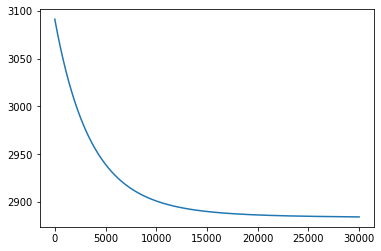

In [20]:
plt.plot(losses)
plt.show()

In [27]:
# test model

predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2940.575009897447

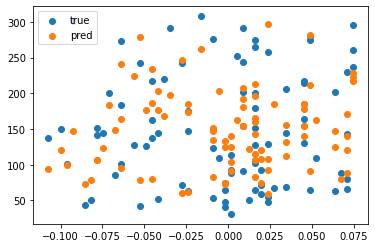

In [28]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

# -------------------------------------------------------------------------------------------

# 자전거 타는 사람 예측

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
test = pd.read_csv("~/data/data/bike-sharing-demand/test.csv")
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [40]:
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [42]:
train.shape

(10886, 12)

In [43]:
test.shape

(6493, 9)

In [46]:
# create column

train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0


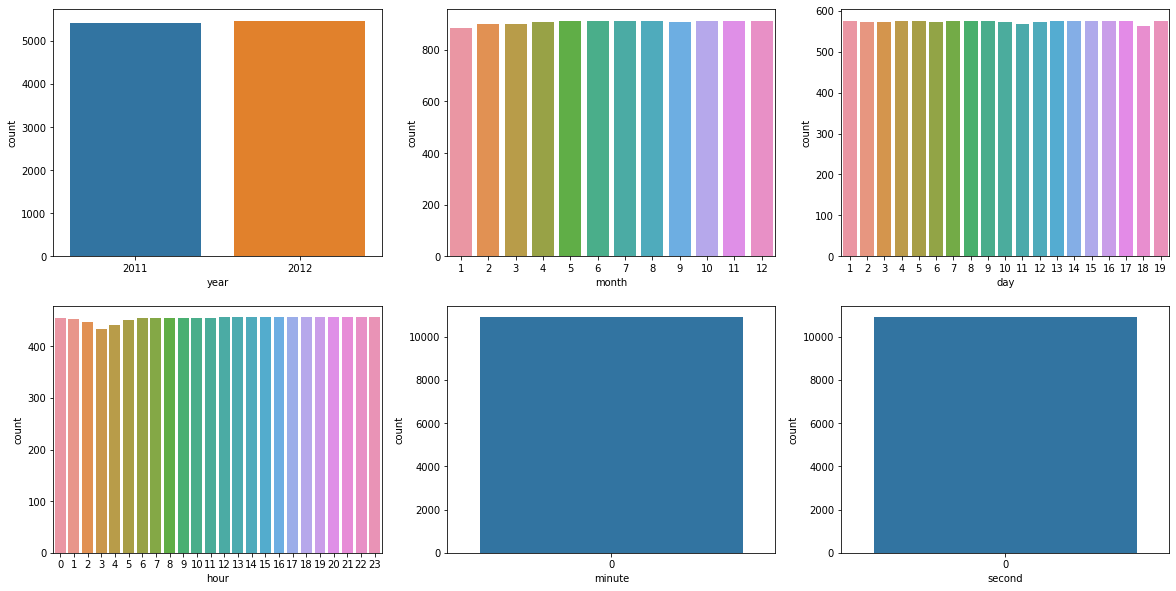

In [47]:
# visualization

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(x='year', data=train)

plt.subplot(2,3,2)
sns.countplot(x='month', data=train)

plt.subplot(2,3,3)
sns.countplot(x='day', data=train)

plt.subplot(2,3,4)
sns.countplot(x='hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x='minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x='second', data=train)

plt.show()

<AxesSubplot:xlabel='second', ylabel='count'>

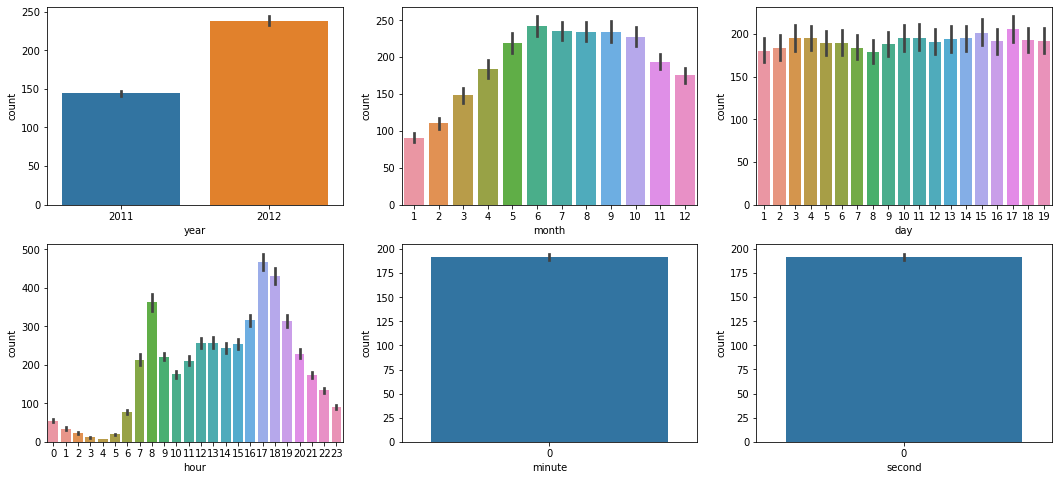

In [49]:
%matplotlib inline

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

In [50]:
# make new train : delete minute, second

new_train = train[["year", "month", "day", "hour"]]
new_train

,year,month,day,hour
0,2011,1,1,0
1,2011,1,1,1
2,2011,1,1,2
3,2011,1,1,3
4,2011,1,1,4
...,...,...,...,...
10881,2012,12,19,19
10882,2012,12,19,20
10883,2012,12,19,21
10884,2012,12,19,22


In [51]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0


In [87]:
# train, test : delete holiday, registered

X = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'year', 'month', 'day', 'hour',]].values
y = train[['count']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# train model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
# predict

predictions = model.predict(X_test)
predictions

array([[176.92009162],
       [ 16.50947624],
       [117.33784574],
       ...,
       [474.9668217 ],
       [  4.66809751],
       [228.94142057]])

In [90]:
rmse = mean_squared_error(y_test, predictions, squared = False)
rmse

111.6525656632822

In [91]:
# visualization

col = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'year', 'month', 'day', 'hour']
X_test_df = pd.DataFrame(X_test, columns=col)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test

In [92]:
X_test_df

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,year,month,day,hour,predictions,y_test
0,3.0,1.0,1.0,33.62,40.150,59.0,0.0000,29.0,2011.0,7.0,19.0,11.0,176.920092,127
1,1.0,0.0,1.0,4.10,6.820,54.0,6.0032,0.0,2012.0,1.0,16.0,6.0,16.509476,13
2,4.0,0.0,1.0,9.84,11.365,48.0,12.9980,12.0,2011.0,12.0,11.0,18.0,117.337846,163
3,3.0,1.0,2.0,29.52,34.090,62.0,12.9980,70.0,2012.0,8.0,15.0,10.0,327.143367,233
4,2.0,1.0,1.0,25.42,31.060,53.0,16.9979,46.0,2012.0,6.0,15.0,23.0,344.002677,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2.0,0.0,3.0,23.78,27.275,49.0,19.0012,106.0,2011.0,5.0,8.0,17.0,276.240282,351
2174,1.0,1.0,3.0,13.12,15.150,66.0,22.0028,0.0,2012.0,1.0,17.0,4.0,76.874354,2
2175,4.0,0.0,1.0,16.40,20.455,40.0,12.9980,149.0,2012.0,11.0,4.0,14.0,474.966822,509
2176,1.0,0.0,1.0,11.48,14.395,81.0,7.0015,0.0,2012.0,1.0,1.0,5.0,4.668098,5


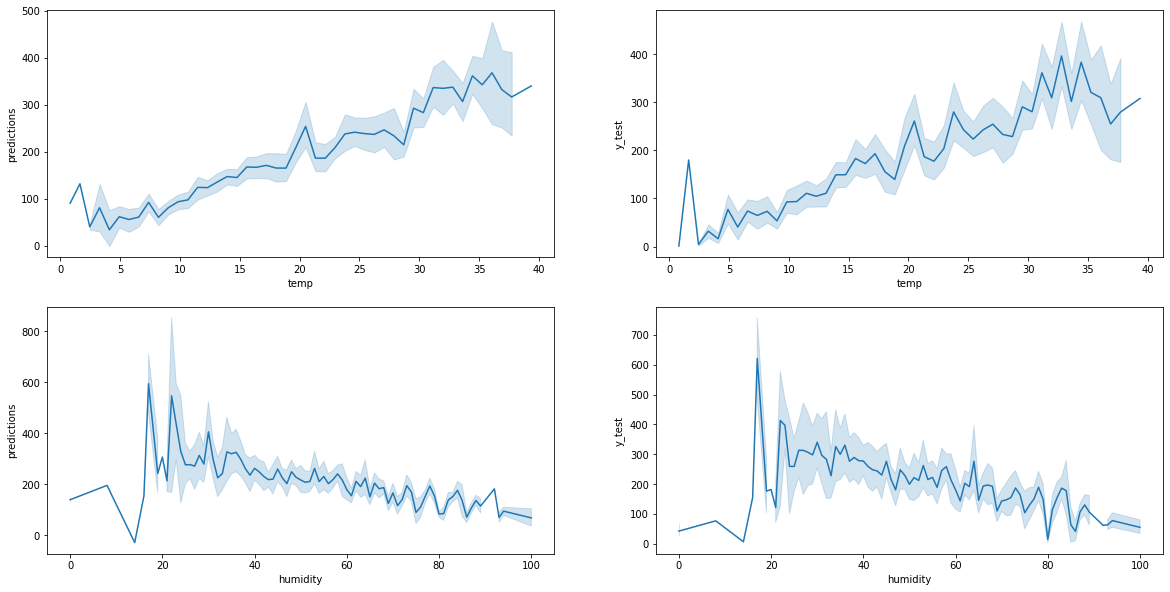

In [93]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'])

plt.subplot(2,2,2)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['y_test'])

plt.subplot(2,2,3)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'])

plt.subplot(2,2,4)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['y_test'])

plt.show()

# - 회고 -

## 당뇨병 예측


처음에는 손실 함수값이 터무니없이 나왔다. 하지만, training 횟수와 learning rate를 계속 변경하여 학습시킨 끝에 2940.575009897447라는 MSE 값을 구했다.



## 자전거 타는 사람 예측


이번 프로젝트 또한 처음부터 터무니 없는 값이 나왔다. 하지만 minute, second, holiday, registered 속성들이 필요없다고 판단하여 제거하고 학습시켰다. 이러한 시도 끝에 111.6525656632822라는 RMSE 값을 구하게 되었다.